In [2]:
import os
from sklearn.svm import SVC
from os import listdir
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Categories=['cats','dogs'] 
flat_data_arr=[]
target_arr=[]
datadir='dataset/train_data/' 
 
for i in Categories: 
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=imread(os.path.join(path,img)) 
        img_resized=resize(img_array,(150,150,3)) 
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(Categories.index(i)) 
    print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)

loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [3]:
df=pd.DataFrame(flat_data)  
df['Target']=target 
df.shape

(2000, 67501)

In [4]:
x=df.iloc[:,:-1]   
y=df.iloc[:,-1]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 

In [6]:
model=SVC(kernel = 'rbf',probability=True)

"param_grid={'C':[0.1,1,10,100], \n            'gamma':[0.0001,0.001,0.1,1], \n            'kernel':['rbf','poly']}  \n \nmodel=GridSearchCV(svc,param_grid)"

In [7]:
model.fit(x_train,y_train)

SVC(probability=True)

In [8]:
y_pred = model.predict(x_test) 

In [9]:
accuracy = accuracy_score(y_pred, y_test) 
print(f"The model is {round(accuracy*100,4)}% accurate")

The model is 62.25% accurate


In [1]:
cm = confusion_matrix(y_test, y_pred)
   
sns.heatmap(cm, annot=True,color="hot", 
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

NameError: name 'confusion_matrix' is not defined

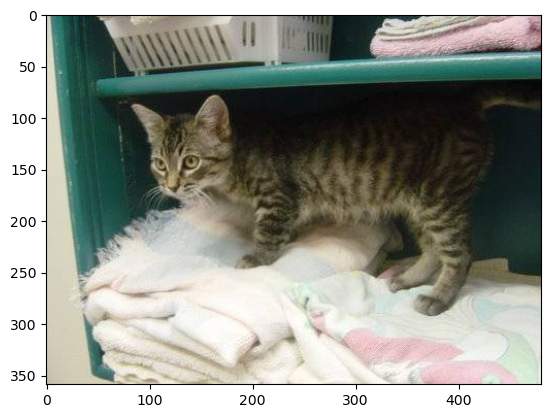

cats = 69.2382048830095%
dogs = 30.761795116990502%
The predicted image is : cats


In [16]:
path='dataset/test_data/test (200).jpg'

img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 

probability=model.predict_proba(l) 

for i,val in enumerate(Categories): 
    print(f'{val} = {probability[0][i]*100}%') 
    
print("The predicted image is : "+Categories[model.predict(l)[0]])

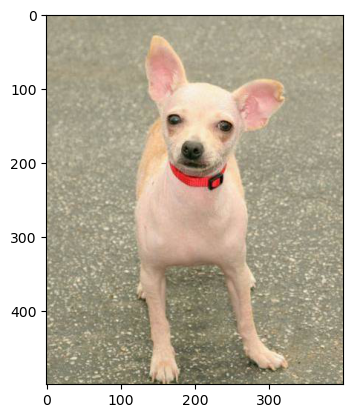

cats = 36.26221814722703%
dogs = 63.737781852772976%
The predicted image is : dogs


In [17]:
path='dataset/test_data/test (1).jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 

probability=model.predict_proba(l) 

for i,val in enumerate(Categories): 
    print(f'{val} = {probability[0][i]*100}%')
    
print("The predicted image is : "+Categories[model.predict(l)[0]])
